# Data Careers Unveiled
### Navigating Salaries, Trends, and Impactful Factors in Data Career Domain.

### Import all relevant libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


### Descriptive Analysis

In [6]:
salary_stats = df['salary'].describe()
print("Descriptive Statistics for Salary:\n", salary_stats)

Descriptive Statistics for Salary:
 count      9355.000000
mean     149927.981293
std       63608.835387
min       14000.000000
25%      105200.000000
50%      143860.000000
75%      187000.000000
max      450000.000000
Name: salary, dtype: float64


### Salary Trends over time:

This analysis provides an overview of the average salary trends over the years. The line plot illustrates how salaries in the data field have evolved, offering insights into potential temporal patterns or fluctuations.

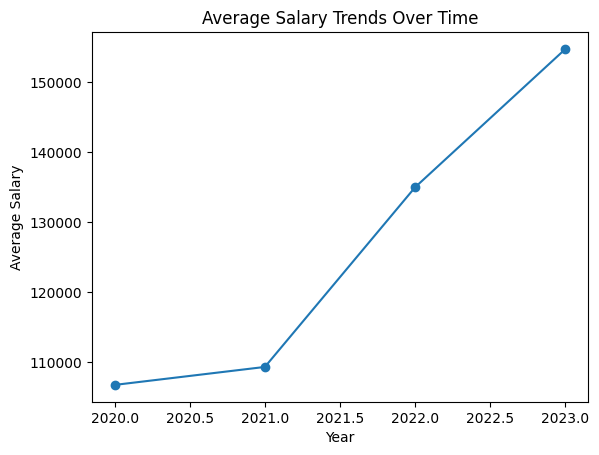

In [7]:
salary_trends = df.groupby('work_year')['salary'].mean()
salary_trends.plot(kind='line', marker='o', title='Average Salary Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.show()

### Job Category Insights

This analysis explores the median salary distribution across broader job categories, providing insights into which areas within the data field are more lucrative.

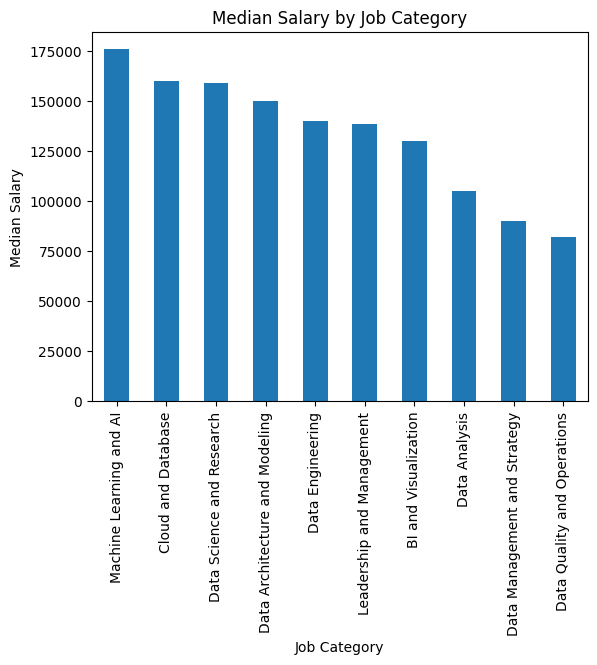

In [8]:
job_title_categories_salary = df.groupby('job_category')['salary'].median().sort_values(ascending=False)
job_title_categories_salary.plot(kind='bar', title='Median Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Median Salary')
plt.show()

### Salary in INR and USD Globally:

Visualizing the distribution of salaries in USD & INR
allows for a direct comparison of salary levels across different currencies, facilitating global salary analysis.

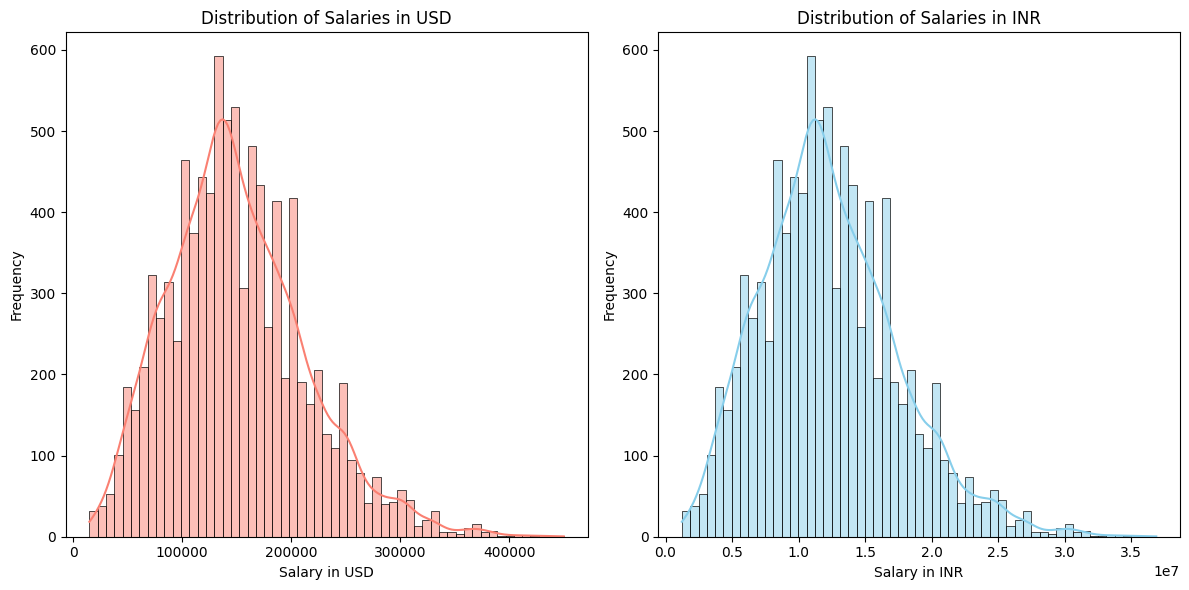

In [37]:
exchange_rate_usd_to_inr = 82.0

df['salary_in_inr'] = df['salary_in_usd'] * exchange_rate_usd_to_inr

plt.figure(figsize=(12, 6))

# Plot histogram for salaries in USD
plt.subplot(1, 2, 1)
sns.histplot(df['salary_in_usd'], kde=True, color='salmon')
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

# Plot histogram for salaries in INR
plt.subplot(1, 2, 2)
sns.histplot(df['salary_in_inr'], kde=True, color='skyblue')
plt.title('Distribution of Salaries in INR')
plt.xlabel('Salary in INR')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Geographical Salary Variations:

This boxplot visualizes how salaries vary based on the country of residence of the employee, providing insights into geographical salary differences and cost-of-living variations.

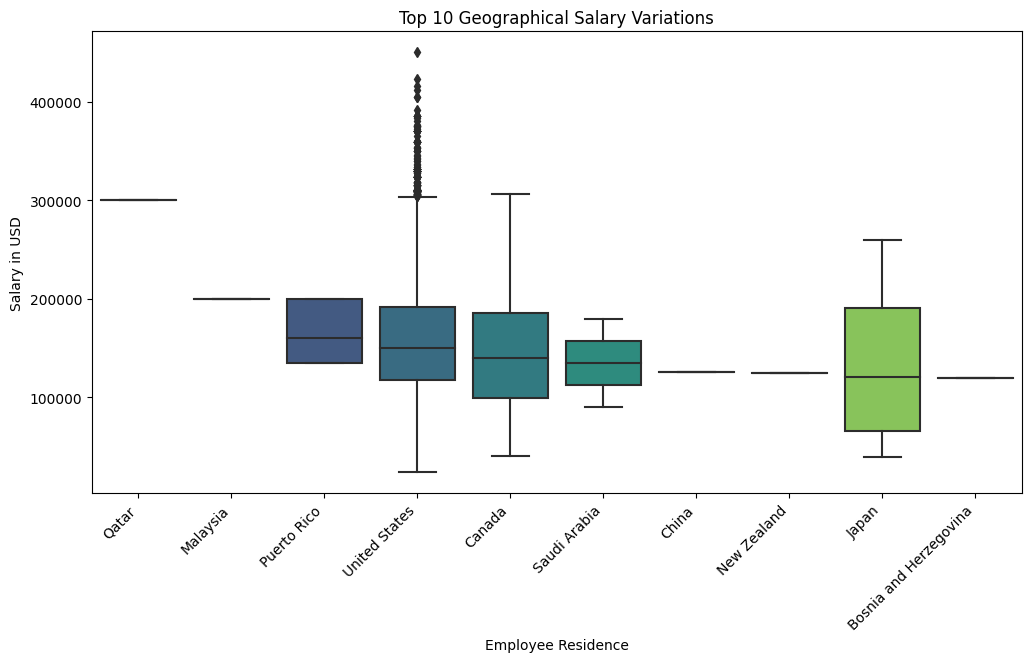

In [38]:
top_10_residences = df.groupby('employee_residence')['salary_in_usd'].median().nlargest(10).index

df_top_10 = df[df['employee_residence'].isin(top_10_residences)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='employee_residence', y='salary_in_usd', data=df_top_10, order=top_10_residences, palette='viridis')
plt.title('Top 10 Geographical Salary Variations')
plt.xlabel('Employee Residence')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.show()


### Experience Level Impact:
Analyzing the impact of experience levels on salary levels, this boxplot illustrates how salary distributions differ for entry-level, mid-level, senior, and executive positions within the data industry.

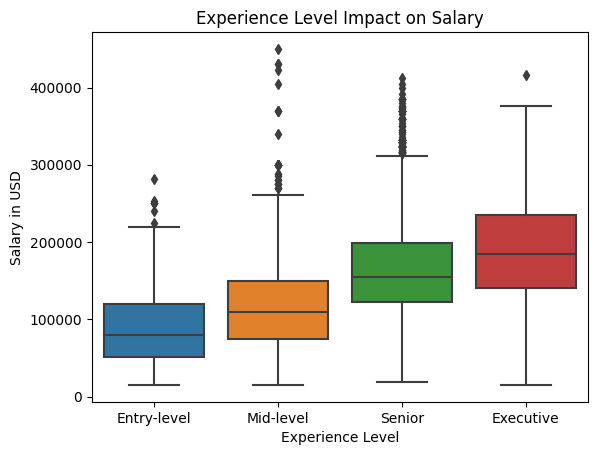

In [29]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['Entry-level', 'Mid-level', 'Senior', 'Executive'])
plt.title('Experience Level Impact on Salary')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

### Employment Type Analysis:

This analysis explores how different employment types, such as full-time, part-time, or contract, influence salary structures within the data field.


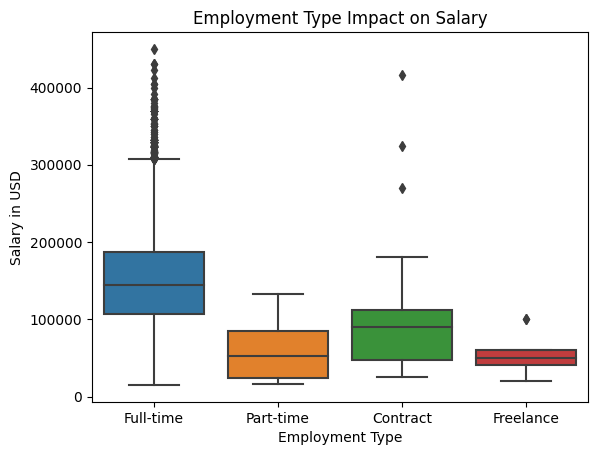

In [30]:
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Employment Type Impact on Salary')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

### Work Setting Influence:

Visualizing the impact of work settings (remote, in-person, or hybrid) on salary levels provides insights into how work environments influence salary structures in the data industry.

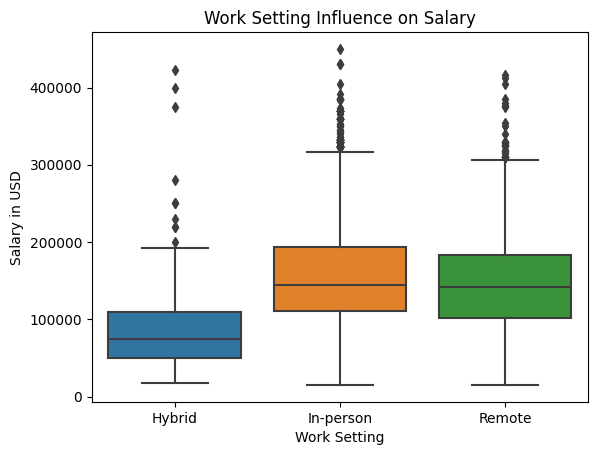

In [31]:
sns.boxplot(x='work_setting', y='salary_in_usd', data=df)
plt.title('Work Setting Influence on Salary')
plt.xlabel('Work Setting')
plt.ylabel('Salary in USD')
plt.show()

### Company Size Analysis:

This analysis investigates how the size of the employer company (small, medium, or large) correlates with salary levels, revealing potential differences in compensation based on company size.

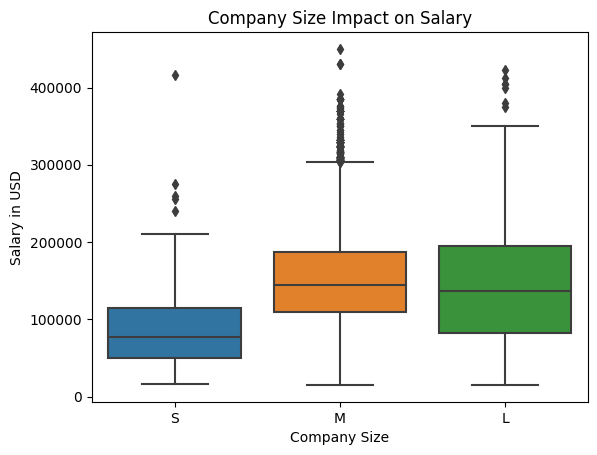

In [32]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=['S', 'M', 'L'])
plt.title('Company Size Impact on Salary')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

### Correlation Analysis:

The correlation matrix visualizes relationships between different variables, helping to identify correlations between factors such as company size, experience level, and salary.

<ipython-input-35-991b0393750f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


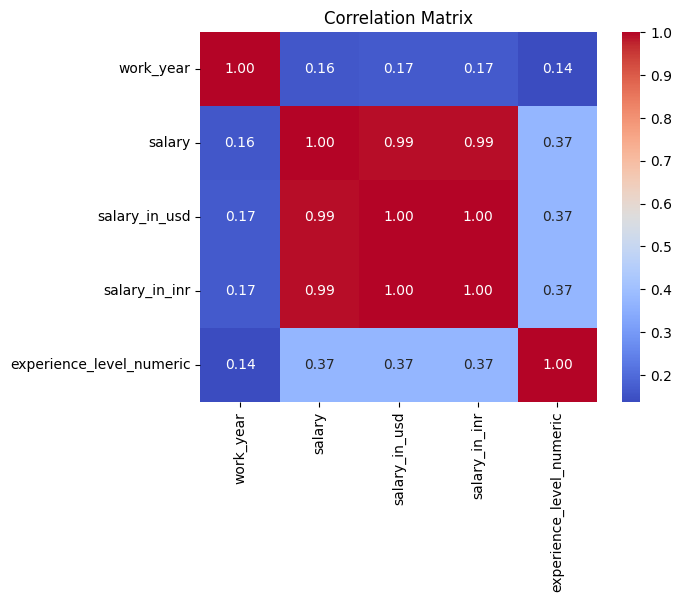

In [35]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Predictive Modeling (Simple Linear Regression):

This section involves building a simple linear regression model to predict salaries based on the numeric encoding of experience levels. The mean squared error is calculated to assess the model's predictive performance.

Mean Squared Error on Test Set: 3600205131.8201447


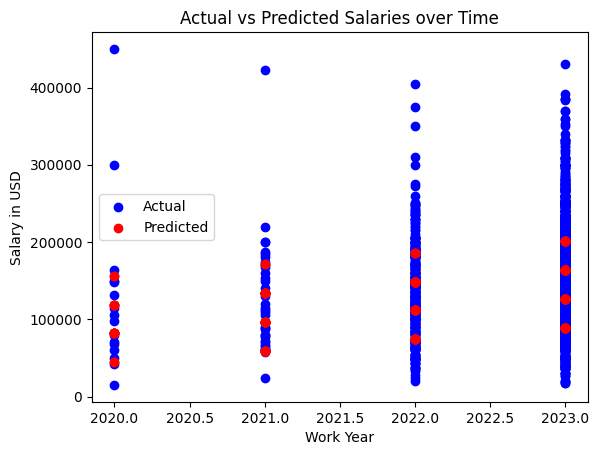

Predicted Salary for 2023: $163722.26
Predicted Salary for 2024: $178595.32
Predicted Salary for 2025: $193468.38


In [36]:
df['work_year'] = df['work_year'].astype(int)
X = df[['experience_level_numeric', 'work_year']]
y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error on Test Set:", mse)

plt.scatter(X_test['work_year'], y_test, color='blue', label='Actual')
plt.scatter(X_test['work_year'], predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted Salaries over Time')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend()
plt.show()

future_years = [2023, 2024, 2025]
future_data = pd.DataFrame({'experience_level_numeric': [3] * len(future_years), 'work_year': future_years})
future_predictions = model.predict(future_data)

for year, prediction in zip(future_years, future_predictions):
    print(f"Predicted Salary for {year}: ${prediction:.2f}")